In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 2327 3439 - Data/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_dir + 'data/fake_job_postings.csv')

In [ ]:
df['title'].nunique()

11231

In [ ]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.isna().sum() / df.shape[0] * 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

There's so few fraudulent jobs in total (compared to the non-fradulent ones)! Let's see if we can *visually* find some patterns by looking just at fraudulent jobs.

In [ ]:
fraudulent_df = df[df['fraudulent']==1]

In [ ]:
print(fraudulent_df.shape)
fraudulent_df["telecommuting"].sum()

(866, 18)


64

Out of 866 fraudulent jobs, only 64 of them have telecommuting == 1! Which means, 64/866 = 7% of fraudulent jobs offer telecommuting.

Let's contrast this with how many real jobs offer telecommuting.

In [ ]:
df["telecommuting"].sum()

767

64 of those telecommuting-offering jobs were fake, so let's subtract that. We have 767 - 64 = 703 real jobs offer telecommuting.

This is out of 17014 real jobs (subtracting the fake jobs from the total number of jobs). So we get: 703/17014 = 4% of real jobs offer telecommuting.

This is in fact a lower proportion than the fake jobs. But, let's also note that we had only 866 fake jobs vs 17000 real jobs, so we can't really say that in general fake jobs are more likely to offer telecommuting. There isn't that much of a significant difference.

In [ ]:
fraudulent_df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17828,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17829,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17830,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
print(fraudulent_df.isna().sum())
print("\nNow let's see the percentages so we can compare with real jobs.")
fraudulent_df.isna().sum() / fraudulent_df.shape[0] * 100

job_id                   0
title                    0
location                19
department             531
salary_range           643
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
fraudulent               0
dtype: int64

Now let's see the percentages so we can compare with real jobs.


job_id                  0.000000
title                   0.000000
location                2.193995
department             61.316397
salary_range           74.249423
company_profile        67.782910
description             0.115473
requirements           17.782910
benefits               42.032333
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

Quickly doing the same thing for real jobs by making a separate real-jobs df.

In [ ]:
real_df = df[df['fraudulent']==0]
real_df.isna().sum() / real_df.shape[0] * 100

job_id                  0.000000
title                   0.000000
location                1.921947
department             64.746679
salary_range           84.453979
company_profile        15.992712
description             0.000000
requirements           14.934760
benefits               40.237452
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

###Clues!

Ah! We got our first clue. Look at how company profile is missing for 15% of the real jobs, while for **67%** of the fake jobs!! That sticks out like a sore thumb. That's probably our most important variable here. This is so massive a difference, in fact, that it probably more than accounts for whatever disparity there is between the size of the two datasets.

Next, employment type is also missing for 27% of fake jobs versus 18% for real jobs. This is also a fairly significant difference which means we can single this out as another variable of interest.

Required experience and required education also seem to be missing more oft in fake jobs vs real jobs: with the same 8-10% disparity. Industry is missing 27% of the time in real jobs vs 31% of the time in fake jobs: we won't include this as a variable of interest, because given the disparity in the size of the datasets, this isn't such a huge difference.

Lasty, salary range also has a fairly-seeable disparity: fake jobs appear to have a missing salary range less of the time.

So, among the text-containing columns, we have as our columns of interest:
- Company profile
- Employment type
- Required experience
- Required education
- Salary range (we're considering it as "text" because it isn't numerical in the strict sense of the word. It's a range)

Now let's look at our boolean columns more closely. We've already removed `telecommuting` from our interest-chart, because the proportion of telecommuting-offering jobs isn't so different in our two datasets, given the disparity in the dataset-sizes themselves.

In [ ]:
num_fakes = fraudulent_df.shape[0]

# Percentage fake jobs that have company logo
has_logo = fraudulent_df["has_company_logo"].sum() / fraudulent_df.shape[0] * 100

# Percentage fake jobs that have questions
has_questions = fraudulent_df["has_questions"].sum() / fraudulent_df.shape[0] * 100

print("Percentages of fake jobs that have logos or questions:")
print(has_logo)
print(has_questions)

Percentages of fake jobs that have logos or questions:
32.67898383371824
28.868360277136258


In [ ]:
num_reals = real_df.shape[0]

# Percentage real jobs that have company logo
has_logo = real_df["has_company_logo"].sum() / real_df.shape[0] * 100

# Percentage real jobs that have questions
has_questions = real_df["has_questions"].sum() / real_df.shape[0] * 100

print("Percentages of real jobs that have logos or questions:")
print(has_logo)
print(has_questions)

Percentages of real jobs that have logos or questions:
81.91489361702128
50.20571294228282


### Results are in!

Whoopie! Here's what we see:

Only **32%** of fake jobs have logos vs **81%** of real jobs. Now that's something!

Just over **28.8%** of fake jobs have questions on their posting, vs **50%** of real jobs do. This isn't as standout as the previous stat, but it's not so far from telling us that **double** the proportion of real jobs have questions, vs fake jobs.

We are getting somewhere.

### Surveying our current work

We now have isolated 4 text-columns of interest, and 2 boolean columns of interest for our data. What makes the text-columns of interest is not their text itself currently, but the stats about their NaN values. We likely won't even need to go into NLP tasks (sentiment analysis etc) or concern ourselves with the text itself in order to create a good-performing logistic regression model.

This is a good sign, because having to perform NLP tasks would have added to the complexity of our overall task, and it is always better to do things as simply as possible so that we are much less likely to be lost if we encounter some issues with the model and need to tune/adjust it. It's much easier to experiment this way.

Discussions aside, because we aren't really concerned with the content of the text so much right now, let's see if we can convert those text columns into numerical/boolean ones to prepare them for logistic regression. We can do two things:

- Replace each text block with an integer representing the number of characters (or we could experiment with something like vectorization)
- Because we are interested in these columns in large part because of how many missing values they have, we can possibly replace `company_profile` with `has_company_profile` - same with the other such columns - and get ourselves a column containing 0s and 1s (boolean-representations).

The second option currently seems simpler to test out, so let's do it. If we don't get a good initial model, we'll come back and turn the text columns into character-counts, and iterate from there.

In [ ]:
text_cols_of_interest = ["company_profile", "employment_type", "required_experience", "required_education", "salary_range"]

# For the WHOLE (original) df, create new boolean for columns and convert to integers (1 for True, 0 for False)
for col in text_cols_of_interest:
    df.loc[:, "has_" + col] = (~df[col].isnull()).astype(int)

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_employment_type,has_required_experience,has_required_education,has_salary_range
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,Internship,NaN,NaN,Marketing,0,1,1,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1,1,1,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,1,1,1,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,1,1,0


Let's do the same for the sub-dataframes we created just in case we need to use them later.

In [ ]:
# For real_df, create new boolean for columns and convert to integers (1 for True, 0 for False)
for col in text_cols_of_interest:
    real_df.loc[:, "has_" + col] = (~real_df[col].isnull()).astype(int)

# real_df.head()

# For fraudulent_df, create new boolean for columns and convert to integers (1 for True, 0 for False)
for col in text_cols_of_interest:
    fraudulent_df.loc[:, "has_" + col] = (~fraudulent_df[col].isnull()).astype(int)

fraudulent_df.head()

<ipython-input-22-b494ca927f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df.loc[:, "has_" + col] = (~real_df[col].isnull()).astype(int)
<ipython-input-22-b494ca927f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df.loc[:, "has_" + col] = (~real_df[col].isnull()).astype(int)
<ipython-input-22-b494ca927f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_employment_type,has_required_experience,has_required_education,has_salary_range
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,...,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,1,1,1,1,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,...,NaN,NaN,NaN,NaN,1,0,0,0,0,0
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,...,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,1,1,1,1,0
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,...,NaN,NaN,NaN,Sales,1,0,0,0,0,0
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,...,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,1,1,1,1,1


### Logistic Regression

Okay. Now, let us take our desired columns: has_company_profile, has_employment_type, has_required_experience, has_required_education, has_company_logo, and has_questions. All of these columns are booleans represented as ints: 0 and 1.

These will be our features, and our target will be `fraudulent`. We'll create a logistic regression model. Note that we will set `class_weight = balanced` in order to minimize skew from the heavy imbalance in our dataset (rawly, we have ~17k real jobs vs 866 fake jobs, which would essentially make our model "drown" in real jobs and not be able to see fake jobs clearly).

In [ ]:
# Selecting features and target variable
features = ['has_company_profile', 'has_employment_type', 'has_required_experience',
            'has_required_education', 'has_company_logo', 'has_questions', "has_salary_range"]
target = 'fraudulent'

# Splitting the data into training and testing sets
# We use the ORIGINAL dataframe rather than the real_df and
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model with class weights balanced
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Printing coefficients
print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)  # You CAN print intercept, but interpreting
                                         #  the intercept for a logistic regression model
                                         #  is a bit complex mathematically (it indicates
                                         #  the "baseline odds of the positive class").

Coefficients: [[-1.64589406 -0.31788008 -0.37648285  0.76791981 -0.93179775 -0.27350152
   0.80570684]]


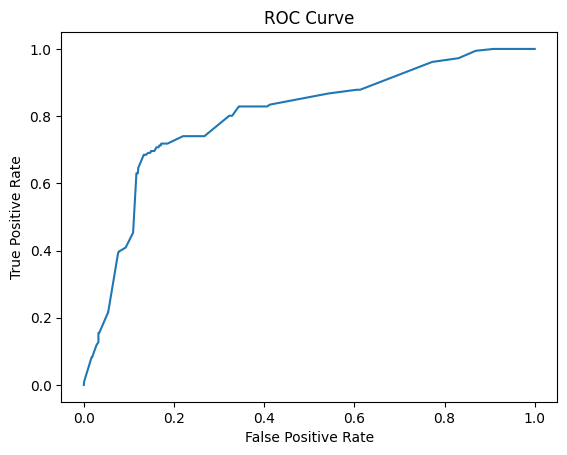

Accuracy: 0.8227069351230425
ROC AUC Score: 0.799183069024158
Confusion Matrix:
 [[2812  583]
 [  51  130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3395
           1       0.18      0.72      0.29       181

    accuracy                           0.82      3576
   macro avg       0.58      0.77      0.59      3576
weighted avg       0.94      0.82      0.87      3576



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

# Scatterplot of predicted probabilities vs actual values
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculate additional performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

The ROC AUC score and the confusion matrix here are the main indicators of the model's performance. Accuracy is also a decent one (it's just the raw ratio of how many predictions the model got right) but only because we balanced our class weights.

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of the model's ability to distinguish between the two classes (in this case, fraudulent and non-fraudulent job postings). ROC score of 1.0 is perfect, while an ROC score of 0 is a poor classifier that makes random predictions.

A score of 0.8 is considered good, and a score of 0.9 is considered excellent, usually. Our score effectively is a 0.8 (if you round up), which makes our model *pretty good* based on what we were expecting.

Before we move ahead, we'll try taking a brief (manual) look at some of the text columns that the model got wrong, seeing if there's some obvious factors that we can (easily) include in our further modeling.



#### Visual survey

In [ ]:
# Get the predictions
preds = model.predict(X_test)

X_test['preds'] = preds

Select all rows in the test data where the prediction is wrong and the
listing is actually fraudulent. Look at these and see if anything seems weird.

Questions to ask: Why was it getting the prediction
wrong? Could we as a human look at it and make a guess that those listings are actually fraudulent? If so, why?

In [ ]:
missed_rows = X_test[(X_test['preds'] != y_test) & y_test].index

In [ ]:
df.iloc[missed_rows].head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_employment_type,has_required_experience,has_required_education,has_salary_range
3941,3942,Customer Service Representative,"US, CA, Los Angeles",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,...,Entry level,High School or equivalent,Real Estate,Customer Service,1,1,1,1,1,1
6202,6203,Market Specialists,"US, OH, Cincinnati",NaN,NaN,Bradley Contracting Group Corporation offers a...,Work with clients and within our company to he...,Develop and execute marketing programs to prom...,"The current, standard company health, life, di...",0,...,Entry level,Associate Degree,Market Research,Marketing,1,1,1,1,1,0
5441,5442,Easy Money,"US, FL, Deltona",NaN,NaN,DMT Instant Reward. We are Hiring all The Time.,"""Do You Want To Own Your Internet Base Busines...","Computer, Internet and Telephone",Work from home Full-time or Part-time be your ...,0,...,NaN,NaN,NaN,NaN,1,1,0,0,0,0
6505,6506,SECURITY OFFICER,"US, TX, AUSTIN",SECURITY,28000-32000,The Accion story began more than 100 years ag...,Monitors an extensive camera system that provi...,High School diploma or GED. One (1) year relat...,FULLTIME BENEFITS,0,...,Entry level,High School or equivalent,Security and Investigations,Customer Service,1,1,1,1,1,1
8647,8648,Payroll Clerk,"US, MD, BALTIMORE",Accounting/Payroll,NaN,At DynCorp International it is our commitment ...,Payroll Clerk Job Purpose: Responsible for Com...,Required Tools Needed below:1. A good computer...,NaN,0,...,Entry level,High School or equivalent,Accounting,Finance,1,1,1,1,1,0


In [ ]:
df.loc[missed_rows, 'description'].iloc[0]

'We are Seeking a candidate whose core values include integrity, compassion and responsibility, and\xa0is focused on building quality relationships with our clients. Candidates must\xa0 have outstanding organizational skills, capable of responding promptly to customer needs while managing duties with accuracy and thoroughness. Candidates must also be able to work from home with a minimal amount of supervision.'

In [ ]:
df.loc[missed_rows, 'description'].iloc[2]

'"Do You Want To Own Your Internet Base Business With No Money Down??"" WHO WANT`S TO MAKE MONEY FROM INTERNET HOME BUSINESS"\xa0"Do you need to own your internet base business with no money down??"You can join for FREE 100% and make good money with DMT Instant Reward at home.\xa0Did you lost your job?\xa0 Do you need money fast?You can start earning money with US right now. This is one time in a life time chance to be your own boss. You can work with us you can earn good money with your own time, be with your family same time.For more information please contact with email or call to get start right away Call\xa0\xa0(386)320-3924 Thank you for reading.\xa0#URL_2de3526577183e329e88128f7bbaa1e78643812a16debd954db221f928453f8b#\xa0'

We see here signs that it might be possible to extract some patterns - especially sentiment patterns - that can help predict fake jobs from the text.

However, it definitely will need to involve NLP, because as we see from the first and the third text, they definitely differ quite a bit in their individual words and tone. The first is masquerading as a respectable job, while the third is very much flaunting how fake it probably is!

So, we'll just move ahead right now and try some adjustments to our original training data, and possibly some other models. The prospect of analyzing the individual texts is promising, but would be a too daunting task for our timeframe. We won't just need to check the fraudulent-data texts, but manually compare them to a lot of real-data texts!

### Logistic Regression 2

Let's use **"character counts"** of each of the text columns rather than just 0s and 1s for them, along with our boolean columns. So we'll have 4 numerical columns and 2 boolean columns to predict our target.

In [ ]:
# Define text columns
text_columns = ['company_profile', 'employment_type', 'required_experience', 'required_education']

# Create new columns for character counts.
#  If there's NaN in the column, we'll put a 0 for the character count
for col in text_columns:
    new_col_name = 'char_count_' + col
    df[new_col_name] = df[col].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,fraudulent,has_company_profile,has_employment_type,has_required_experience,has_required_education,has_salary_range,char_count_company_profile,char_count_employment_type,char_count_required_experience,char_count_required_education
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,1,1,1,0,0,885,5,10,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,1,1,1,0,0,1286,9,14,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,1,0,0,0,0,879,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,1,1,1,1,0,614,9,16,17
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,1,1,1,1,0,1628,9,16,17


Now let's fit a new logistic regression model on this modified training data.

Note that it is VERY IMPORTANT to set `class_weight = balanced` if you don't want the model to go off its hook because of the imbalanced dataset.

In [ ]:
# Select numerical features (character counts), boolean columns, and target variable
numerical_features = ['char_count_company_profile', 'char_count_employment_type', 'char_count_required_experience', 'char_count_required_education']
boolean_columns = ['has_company_logo', 'has_questions', 'has_salary_range']
target_variable = 'fraudulent'  # Replace 'fraudulent' with your actual target variable

# Combine numerical features and boolean columns
selected_features = numerical_features + boolean_columns
print(selected_features)

# Split the data into training and testing sets
X = df[selected_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model2 = LogisticRegression(class_weight="balanced")
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Printing coefficients
print("Coefficients:", model.coef_)

['char_count_company_profile', 'char_count_employment_type', 'char_count_required_experience', 'char_count_required_education', 'has_company_logo', 'has_questions', 'has_salary_range']
Coefficients: [[-1.64589406 -0.31788008 -0.37648285  0.76791981 -0.93179775 -0.27350152
   0.80570684]]


Evaluating our model.

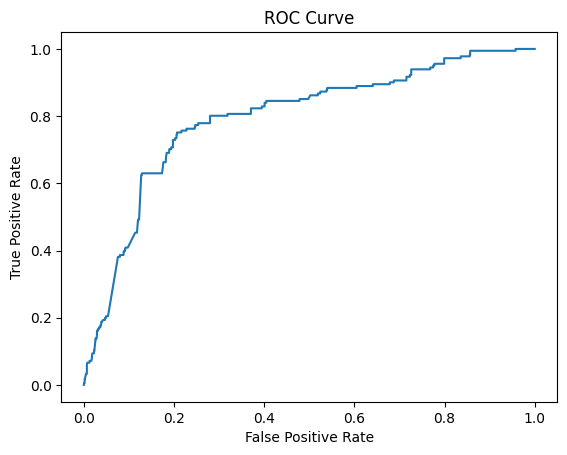

Accuracy: 0.7843959731543624
ROC AUC Score: 0.7945215176689802
Confusion Matrix:
 [[2669  726]
 [  45  136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      3395
           1       0.16      0.75      0.26       181

    accuracy                           0.78      3576
   macro avg       0.57      0.77      0.57      3576
weighted avg       0.94      0.78      0.84      3576



In [ ]:
# Scatterplot of predicted probabilities vs actual values
y_pred_prob = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculate additional performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Comments

It seems like we get more or less the same performance with this model that we did with the first model. The ROC score is in fact **higher** for the first model than it is for `model2`.

One of the things this might indicate, which tallies with what we might expect, is that how *long* a company's profile description or questions-asked might be, doesn't matter so much as the fact that there *is* (or isn't) a profile description etc. in the first place.

If a company is putting in the time to give some intro about themselves, it's naturally less likely that the posting might've been made by a bot or be fake. If a company is posting *some* form of education_type required, there's only so many ways you can say "Bachelor's degree" or "High school degree", so the length probably doesn't even vary so much!

Indeed, we see a very interesting thing: the coefficient of the `char_count_company_profile` column for the second model is about the *same* as the coefficient of the `has_company_profile` column for the first model. Both models are ending up giving the same weightage to `company_profile` - based most likely on missing values (0s). This pattern is there for all the text-corresponding columns.

Regardless, we have a good baseline in model1, with its 79.44% ROC AUC score, so let's decide on that one and move ahead with trying out a couple different models to see if we can get anything better quickly.

### Gradient Boosting Classifier

Let's try using our numerical + boolean columns for a gradient boosting classifier model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Define numerical features and target variable
numerical_features = ['char_count_company_profile', 'char_count_employment_type', 'char_count_required_experience', 'char_count_required_education']
boolean_columns = ['has_company_logo', 'has_questions', 'has_salary_range']
target_variable = 'fraudulent'  # Replace 'fraudulent' with your actual target variable

# Combine numerical features and boolean columns
selected_features = numerical_features + boolean_columns

# Split the data into training and testing sets
X = df[selected_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions and evaluate Gradient Boosting Classifier
gb_y_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, gb_y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ROC_AUC:", roc_auc)
print("Confusion Matrix:", conf_matrix)

Gradient Boosting Classifier Accuracy: 0.9580536912751678

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       0.94      0.18      0.31       181

    accuracy                           0.96      3576
   macro avg       0.95      0.59      0.64      3576
weighted avg       0.96      0.96      0.94      3576

ROC_AUC: 0.7945215176689802
Confusion Matrix: [[2669  726]
 [  45  136]]


### Comments

ROC_AUC is again more valuable here than accuracy (also because Gradient Boosting Classifier doesn't provide us a class_weight parameter, rather choosing to try balance weights internally).

Indeed, though, this ROC score doesn't beat our baseline!

### Random Forest Classifier

Let's try this as our last model.

In [ ]:
# Instantiate and train Random Forest Classifier with balanced class weights
rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train, y_train)  # same data as before

# Make predictions and evaluate Random Forest Classifier
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ROC_AUC:", roc_auc)
print("Confusion Matrix:", conf_matrix)


Random Forest Classifier Accuracy: 0.9147091722595079

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3395
           1       0.35      0.82      0.49       181

    accuracy                           0.91      3576
   macro avg       0.67      0.87      0.72      3576
weighted avg       0.96      0.91      0.93      3576

ROC_AUC: 0.7945215176689802
Confusion Matrix: [[2669  726]
 [  45  136]]


### Comments

Interestingly, the random forest classifier achieves the exact same ROC AUC score as the Gradient Booster.

However, it's other scores (precision, recall, f1, etc.) differ. We can analyze this in a bit after we re-run our initial baseline model to confirm that it indeed had the highest ROC score - aka discrimination capacity, which we're taking as our gold standard given that we want to have a model that's good at distinguishing between real and fake jobs.

Coefficients: [[-1.64589406 -0.31788008 -0.37648285  0.76791981 -0.93179775 -0.27350152
   0.80570684]]


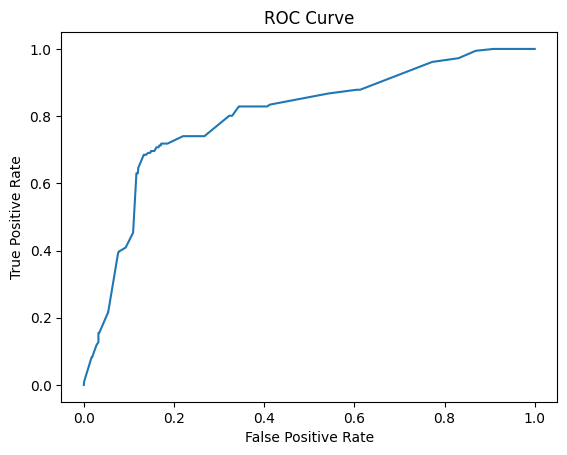

ROC AUC Score: 0.799183069024158
Confusion Matrix:
 [[2812  583]
 [  51  130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3395
           1       0.18      0.72      0.29       181

    accuracy                           0.82      3576
   macro avg       0.58      0.77      0.59      3576
weighted avg       0.94      0.82      0.87      3576



In [ ]:
# Selecting features and target variable
features = ['has_company_profile', 'has_employment_type', 'has_required_experience',
            'has_required_education', 'has_company_logo', 'has_questions', 'has_salary_range']
target = 'fraudulent'

# Splitting the data into training and testing sets
# We use the ORIGINAL dataframe rather than the real_df and
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model with class weights balanced
BASELINE = LogisticRegression(class_weight='balanced')
BASELINE.fit(X_train, y_train)

# Making predictions on the test set
y_pred = BASELINE.predict(X_test)

# Printing coefficients
print("Coefficients:", model.coef_)

# Scatterplot of predicted probabilities vs actual values
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculate additional performance metrics
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Indeed, ROC AUC score of this model comes out on top.

### Examining performance metrics of chosen model

Let's examine the other performance metrics of our baseline (and chosen) logistic regression model.

- **Coefficients**: Each coefficient in the printed list of coefficients corresponds to the same-position variable in the input-column list. So (if you take a quick look above again) you can see that "has_company_profile" appears to have the most significant coefficient (largest magnitude) compared to the others. This is what we expected. Since it is negative, what essentially it means is that when a job posting _has_ a company profile, its treated as less likely to be a fake job by the model. And its treated as so, to the same degree as the magnitude of the coefficient is. If a job posting has employment_type given, for example, it affects the probability of it being a fake job drastically less than _company_profile does - in fact by about 5 times less.

**Confusion Matrix**: What we care about here is the second row, the sum of which represents the "actual positives" in the test set. So, out of 51 + 130 = 181 fake jobs, the model predicted 130 of them to rightly be fake. This is a pretty good performance! Remember, the model had never seen the test set entries before.

**ROC AUC Score**: Our chosen metric, once again. A score of ~0.80 represents the fact that the model has an 80% chance of correctly ranking a randomly chosen positive higher than a randomly chosen negative (i.e., it's less likely to get false negatives, i.e., it is a better discriminator). We definitely are quite pleased with our "simple and sweet" logistic regressor's performance.

### Concluding

We have conducted a good analysis of the fake job postings dataset in this notebook, which combined with our EDA notebook should be a great foundation for anyone who wants to do future research on the dataset. We have managed to create a simple, well-performing logistic regression model that can act as the baseline for anyone who wants to expand on our work by doing more complex NLP-based modeling, or using more involved ensemble-learning methods.

As mentioned before, one of the first ways we would suggest anyone to begin building on our work is by manually trying to find textual patterns/sentiment patterns in the descriptions of fake jobs and comparing them visually to the real jobs. We believe this is is the only way we can push a new model's accuracy to above 90%, given how we saw that as long as we stay in the numerical-data realm, 80% appears to be our benchmark.

Good luck!